# Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.


Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов
Тариф «Смарт»:
 - Ежемесячная плата: 550 рублей
 - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика.
 - Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.
 
Тариф «Ультра»:
 - Ежемесячная плата: 1950 рублей
 - Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
 - Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

### Подготовьте данные
 - Приведите данные к нужным типам;
 - Найдите и исправьте ошибки в данных, если они есть.
 - Поясните, какие ошибки вы нашли и как их исправили. В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.
 
### Посчитайте для каждого пользователя:
 - количество сделанных звонков и израсходованных минут разговора по месяцам;
 - количество отправленных сообщений по месяцам;
 - объем израсходованного интернет-трафика по месяцам;
 - помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).
 
### Проанализируйте данные
 - Опишите поведение клиентов оператора, исходя из выборки.
 - Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?  
 - Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.
 
### Проверьте гипотезы
 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
 
Пороговое значение alpha задайте самостоятельно.
Поясните:
 - как вы формулировали нулевую и альтернативную гипотезы;
 - какой критерий использовали для проверки гипотез и почему.

### Напишите общий вывод

# Описание данных

Таблица users (информация о пользователях):

    user_id — уникальный идентификатор пользователя
    first_name — имя пользователя
    last_name — фамилия пользователя
    age — возраст пользователя (годы)
    reg_date — дата подключения тарифа (день, месяц, год)
    churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    city — город проживания пользователя
    tarif — название тарифного плана
    
Таблица calls (информация о звонках):

    id — уникальный номер звонка
    call_date — дата звонка
    duration — длительность звонка в минутах
    user_id — идентификатор пользователя, сделавшего звонок
    
Таблица messages (информация о сообщениях):

    id — уникальный номер сообщения
    message_date — дата сообщения
    user_id — идентификатор пользователя, отправившего сообщение
    
Таблица internet (информация об интернет-сессиях):

    id — уникальный номер сессии
    mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    session_date — дата интернет-сессии
    user_id — идентификатор пользователя
    Таблица tariffs (информация о тарифах):
    tariff_name — название тарифа
    rub_monthly_fee — ежемесячная абонентская плата в рублях
    minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    messages_included — количество сообщений в месяц, включённых в абонентскую плату
    mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Загрузка данных и подготовка их к анализу

In [1]:
import pandas  as pd
import numpy as np
import math as math
from scipy import stats as st
from matplotlib import pyplot  as plt
from matplotlib.pyplot import figure
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Создадим 5 df (calls, internet, messages, users, tarif ) на основании данных предоставленных для анализа

In [2]:
calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')
internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')
messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')
users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')
tarif = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')

Посмотрим на типы данных внутри этих df:

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [5]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
tarif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Первично обнаружено что в df `users` есть не соответсвтие в столбце `churn_date` (дата прекращения пользования тарифом). Однако судя по описанию это значит, что тариф ещё действовал на момент выгрузки данных (из исходных данных). Поэтому это не те пропуски которые могут нас интересовать. В остальных df очевидных попусков нет.

Все даты которые обнаружены, являются типом `object`. Стоит привести их к `datetime`. Вынесем их:

 - call_date (calls)
 - reg_date (users)
 - churn_date (users)
 - message_date (messages)
 - session_date (internet)

## Предобработка данных

Как было отмечено даты приведем к формату даты , а также выделим месяцы в каждом из df:

In [8]:
users = (users.assign(reg_date = pd.to_datetime(users['reg_date'], errors='coerce'),
                      churn_date = pd.to_datetime(users['churn_date'], errors='coerce')))

messages = (messages.assign(message_date = pd.to_datetime(messages['message_date'], errors='coerce'),
                            month = pd.DatetimeIndex(messages['message_date']).month))

internet = (internet.assign(session_date = pd.to_datetime(internet['session_date'], errors='coerce'),
                            month = pd.DatetimeIndex(internet['session_date']).month))


calls = (calls.assign(call_date = pd.to_datetime(calls['call_date'], errors='coerce'),
                       month = pd.DatetimeIndex(calls['call_date']).month))                     

Дальнейший подход будет заключаться в том, что мы объеденим все 5 df в один в котором будет содержаться интересующая нас информация:

1) `user_id` и `month` ( нужны для формирования промежуточных данных. По ним будет осуществляться группировка);

2) `tarif` - название тарифа (smart или ultra);

3) `sms_count` - количество отправленных смс в месяц;

4) `duration_calls` - общая продолжительность звонков в месяц;

5) `calls_count` - количество звонков ( в звонках интересуют минуты а не их количество , но для статистики можно и составить);

6) `gb_used` - потраченное количество интернет траффика в ГБ ( округленных до ближайшего целого вверх);

7) `city` - город проживания. Нужен для статистического аналиаз;

8) Столбцы с расчетами платы за лимиты сверх тарифов:

а) `revenue_internet` (за интернет);
       
б) `revenue_calls` ( за звонки );
       
в) `revenue_sms` (за смс);
       
г) `revenue` - итоговые траты.
       
Очевидных пропусков на момент рассмотрения исходных данных не было обнаружено. Проблем с неточностью написания здесь быть не может ( во всяком случае заполнить их чем - то не предоставляется возможным) . Стоит провести окончательную проверку на пропуски после формирования окончательного df. Он будет называться `total`

Как было заявлено, оператор округляет каждый звонок до ближайшей целой минуту (вверх). Эту надо сделать на данном этапе , потому что в итоговой таблице будет считаться общая продолжительность в минутах за весь месяц ( потеряется много не округленных минут). 

In [9]:
calls['duration_stat'] = calls['duration'].apply(lambda x: math.ceil(x))

In [10]:
calls

,id,call_date,duration,user_id,month,duration_stat
0,1000_0,2018-07-25,0.00,1000,7,0
1,1000_1,2018-08-17,0.00,1000,8,0
2,1000_2,2018-06-11,2.85,1000,6,3
3,1000_3,2018-09-21,13.80,1000,9,14
4,1000_4,2018-12-15,5.18,1000,12,6
...,...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,12,1
202603,1499_216,2018-10-18,18.83,1499,10,19
202604,1499_217,2018-11-10,10.81,1499,11,11
202605,1499_218,2018-10-06,4.27,1499,10,5


Объеденим таблицы `users` и `internet` и сгруппируем по id пользователей и номеру месяца, посчитав общее количество траффика.

In [11]:
prom_1 = users.merge(internet, on='user_id',how='outer').groupby(['user_id','month','tariff','city'])['mb_used']\
.sum().reset_index()

In [12]:
prom_1

,user_id,month,tariff,city,mb_used
0,1000,5.0,ultra,Краснодар,2253.49
1,1000,6.0,ultra,Краснодар,23233.77
2,1000,7.0,ultra,Краснодар,14003.64
3,1000,8.0,ultra,Краснодар,14055.93
4,1000,9.0,ultra,Краснодар,14568.91
...,...,...,...,...,...
3198,1498,10.0,smart,Владикавказ,20579.36
3199,1499,9.0,smart,Пермь,1845.75
3200,1499,10.0,smart,Пермь,17788.51
3201,1499,11.0,smart,Пермь,17963.31


Аналогично поступим с таблицей `messages`, посчитав количество смс:

In [13]:
prom_2 = users.merge(messages, on='user_id',how='outer').groupby(['user_id','month'])['id'].count().reset_index()

In [14]:
prom_2 = prom_2.rename(columns = {'id': 'sms_count'})

In [15]:
prom_2

,user_id,month,sms_count
0,1000,5.0,22
1,1000,6.0,60
2,1000,7.0,75
3,1000,8.0,81
4,1000,9.0,57
...,...,...,...
2712,1498,10.0,42
2713,1499,9.0,11
2714,1499,10.0,48
2715,1499,11.0,59


и `calls`

In [16]:
prom_3 = users.merge(calls, on='user_id',how='outer').\
groupby(['user_id','month']).agg({'duration_stat':sum, 'id':'count'}).reset_index()

In [17]:
prom_3

,user_id,month,duration_stat,id
0,1000,5.0,159.0,22
1,1000,6.0,172.0,43
2,1000,7.0,340.0,47
3,1000,8.0,408.0,52
4,1000,9.0,466.0,58
...,...,...,...,...
3169,1498,10.0,247.0,41
3170,1499,9.0,70.0,9
3171,1499,10.0,449.0,68
3172,1499,11.0,612.0,74


In [18]:
prom_3 = prom_3.rename(columns = {'id': 'calls_count'})

In [19]:
total = pd.merge(prom_1, prom_2, how='outer', on=['user_id', 'month']).merge(prom_3, how='left', on=['user_id', 'month'])

In [20]:
total

,user_id,month,tariff,city,mb_used,sms_count,duration_stat,calls_count
0,1000,5.0,ultra,Краснодар,2253.49,22.0,159.0,22.0
1,1000,6.0,ultra,Краснодар,23233.77,60.0,172.0,43.0
2,1000,7.0,ultra,Краснодар,14003.64,75.0,340.0,47.0
3,1000,8.0,ultra,Краснодар,14055.93,81.0,408.0,52.0
4,1000,9.0,ultra,Краснодар,14568.91,57.0,466.0,58.0
...,...,...,...,...,...,...,...,...
3209,1273,11.0,NaN,NaN,NaN,29.0,272.0,45.0
3210,1273,12.0,NaN,NaN,NaN,39.0,260.0,41.0
3211,1377,2.0,NaN,NaN,NaN,2.0,179.0,23.0
3212,1392,2.0,NaN,NaN,NaN,3.0,13.0,2.0


### пересчет итоговой таблицы:

In [21]:
prom_1 = internet.groupby(['user_id','month'])['mb_used']\
.sum().reset_index()
prom_1

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


In [22]:
prom_2 = messages.groupby(['user_id','month']).agg(
    sms_count = pd.NamedAgg(column = 'id', aggfunc = 'count')
                                                  ).reset_index()
prom_2

,user_id,month,sms_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [23]:
prom_3 = calls.groupby(['user_id','month'])\
.agg(
    duration_stat = pd.NamedAgg(column = 'duration_stat', aggfunc = 'sum'),
    calls_count  = pd.NamedAgg(column = 'id', aggfunc = 'count')        
                               ).reset_index()
prom_3

,user_id,month,duration_stat,calls_count
0,1000,5,159,22
1,1000,6,172,43
2,1000,7,340,47
3,1000,8,408,52
4,1000,9,466,58
...,...,...,...,...
3169,1498,10,247,41
3170,1499,9,70,9
3171,1499,10,449,68
3172,1499,11,612,74


Создадим промежуточный дата фрейм из таблицы users - в нем оставим только интересующие нас столбцы:

In [24]:
prom_4 = users[['user_id','tariff','city']]

объеденим все данные по рассходу услуг в сводную таблицу total_prom

In [25]:
total_prom = prom_1.merge(prom_2, how ='outer')
total_prom = total_prom.merge(prom_3, how ='outer')
total_prom

,user_id,month,mb_used,sms_count,duration_stat,calls_count
0,1000,5,2253.49,22.0,159.0,22.0
1,1000,6,23233.77,60.0,172.0,43.0
2,1000,7,14003.64,75.0,340.0,47.0
3,1000,8,14055.93,81.0,408.0,52.0
4,1000,9,14568.91,57.0,466.0,58.0
...,...,...,...,...,...,...
3209,1273,11,NaN,29.0,272.0,45.0
3210,1273,12,NaN,39.0,260.0,41.0
3211,1377,2,NaN,2.0,179.0,23.0
3212,1392,2,NaN,3.0,13.0,2.0


Объеденив с prom_4 получим картину использования услуг пользователями: 

In [26]:
total= total_prom.merge(prom_4, how ='outer')

In [27]:
total

,user_id,month,mb_used,sms_count,duration_stat,calls_count,tariff,city
0,1000,5.0,2253.49,22.0,159.0,22.0,ultra,Краснодар
1,1000,6.0,23233.77,60.0,172.0,43.0,ultra,Краснодар
2,1000,7.0,14003.64,75.0,340.0,47.0,ultra,Краснодар
3,1000,8.0,14055.93,81.0,408.0,52.0,ultra,Краснодар
4,1000,9.0,14568.91,57.0,466.0,58.0,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3211,1273,10.0,NaN,35.0,315.0,40.0,ultra,Курган
3212,1273,11.0,NaN,29.0,272.0,45.0,ultra,Курган
3213,1273,12.0,NaN,39.0,260.0,41.0,ultra,Курган
3214,1128,NaN,NaN,NaN,NaN,NaN,ultra,Волжский


Колонок стало 3216 (пользовался бы inner - их бы не выскочило). Вышло 2 пользователя с id **1371** и **1128** для которых нет информации об использовании услуг ни в одном из исходных дата фреймов, посмотрим на профили пользователей:

In [28]:
users.loc[(users['user_id'] == 1371) | (users['user_id'] == 1301)]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
301,1301,26,NaT,Махачкала,Наида,Авраменко,2018-09-27,smart
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


Посмотрим на максимальную дату регистрации:

In [29]:
users['reg_date'].max()

Timestamp('2018-12-31 00:00:00')

Видим что для первого пользователя (1301) в churn_date стоит пропуск, то есть пользователь активен, однако не пользуется телефоном, то есть платит только абонетскую плату . В рамках данного исследования это существенного влияния не окажет ( тем более всего один проблемный пользователь)

для второго (1371) - прекратил пользоваться тарифом 30 декабря. Скорее всего данные неуспели подгрузится на сервер. В рамках исследования это никакого влияния не окажет.

Можно этих пользователь убрать из итоговой таблицы.

In [30]:
total = total.loc[total['month'].notna()]
total = total.fillna(0)

In [31]:
total

,user_id,month,mb_used,sms_count,duration_stat,calls_count,tariff,city
0,1000,5.0,2253.49,22.0,159.0,22.0,ultra,Краснодар
1,1000,6.0,23233.77,60.0,172.0,43.0,ultra,Краснодар
2,1000,7.0,14003.64,75.0,340.0,47.0,ultra,Краснодар
3,1000,8.0,14055.93,81.0,408.0,52.0,ultra,Краснодар
4,1000,9.0,14568.91,57.0,466.0,58.0,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3209,1273,8.0,0.00,41.0,253.0,53.0,ultra,Курган
3210,1273,9.0,0.00,32.0,223.0,33.0,ultra,Курган
3211,1273,10.0,0.00,35.0,315.0,40.0,ultra,Курган
3212,1273,11.0,0.00,29.0,272.0,45.0,ultra,Курган


Помним, что нас интересуют не mb а gb - поэтому создадим новый столбец, который это посчитает и округлит до ближайшего целого вверх:

In [32]:
total['gb_used'] = (total['mb_used']/1024).apply(lambda x: math.ceil(x))

Уберем столбец с mb и переименуем столбец `duration_stat` на более логичный `duration_calls`

In [33]:
total = total.rename(columns ={'duration_stat':'duration_calls'})
total['month'] = total['month'].astype(int)
total = total.drop(columns ='mb_used')

Проверим верность всех манипуляций:

In [34]:
total.sort_values('gb_used', ascending = False)

,user_id,month,sms_count,duration_calls,calls_count,tariff,city,gb_used
799,1124,10,121.0,1225.0,152.0,ultra,Махачкала,49
1524,1240,8,0.0,457.0,54.0,ultra,Воронеж,48
1622,1255,7,0.0,263.0,37.0,ultra,Саранск,45
1901,1300,11,170.0,658.0,88.0,ultra,Москва,44
159,1024,11,0.0,1146.0,157.0,ultra,Санкт-Петербург,43
...,...,...,...,...,...,...,...,...
592,1094,5,3.0,107.0,16.0,ultra,Новосибирск,0
2499,1392,2,3.0,13.0,2.0,ultra,Челябинск,0
2389,1377,2,2.0,179.0,23.0,ultra,Брянск,0
2298,1365,10,1.0,43.0,5.0,smart,Ростов-на-Дону,0


### Подсчет затрат пользователей на "сверх лимиты"

Вспомним, какие условия существуют для каждого из тарифов:

Тариф «Смарт»:
 - Ежемесячная плата: 550 рублей
 - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика.
 - Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.
 
Тариф «Ультра»:
 - Ежемесячная плата: 1950 рублей
 - Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
 - Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

Посмотрим таблицу `tarif`:

In [35]:
tarif

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Объединять с total  будем по столбцу `tariff`. Для этого нужно переименовать столбец `tariff_name` а также стоит столбец с mb перевести в gb.  

In [36]:
tarif['mb_per_month_included'] = (tarif['mb_per_month_included']/1024).apply(lambda x: math.ceil(x))
tarif = tarif.rename(columns = {'tariff_name':'tariff', 'mb_per_month_included':'gb_per_month_included'})

In [37]:
total = pd.merge(total, tarif, how='left', on='tariff')

In [38]:
def revenue_internet(data):
    if data['tariff'] == 'smart':
        if data['gb_used'] > data['gb_per_month_included']:
            return (data['gb_used'] - data['gb_per_month_included']) * data['rub_per_gb']
        else:
            return 0
    elif data['tariff'] == 'ultra':
        if data['gb_used'] > data['gb_per_month_included']:
            return (data['gb_used'] - data['gb_per_month_included']) * data['rub_per_gb']
        else:
            return 0
        return 0

In [39]:
def revenue_calls(data):
    if data['tariff'] == 'smart':
        if data['duration_calls'] > data['minutes_included']:
            return (data['duration_calls'] - data['minutes_included']) * data['rub_per_minute']
        else:
            return 0
    elif data['tariff'] == 'ultra':
        if data['duration_calls'] > data['minutes_included']:
            return (data['duration_calls'] - data['minutes_included'])* data['rub_per_minute']
        else:
            return 0
        return 0

In [40]:
def revenue_sms(data):
    if data['tariff'] == 'smart':
        if data['sms_count'] > data['messages_included']:
            return (data['sms_count'] - data['messages_included']) * data['rub_per_message']
        else:
            return 0
    elif data['tariff'] == 'ultra':
        if data['sms_count'] > data['messages_included']:
            return (data['sms_count'] - data['messages_included']) * data['rub_per_message']
        else:
            return 0
        return 0

In [41]:
def revenue_total(data):
    if data['tariff'] == 'ultra':
        return data['revenue_sms'] + data['revenue_calls'] + data['revenue_internet'] + data['rub_monthly_fee']
    elif data['tariff'] == 'smart':
        return data['revenue_sms'] + data['revenue_calls'] + data['revenue_internet'] + data['rub_monthly_fee']

Применим функции:

In [42]:
total['revenue_internet'] = total.apply(revenue_internet, axis =1)
total['revenue_calls'] = total.apply(revenue_calls, axis =1)
total['revenue_sms'] = total.apply(revenue_sms, axis =1)
total['revenue_total'] = total.apply(revenue_total, axis =1)

За ненадобностью удалим все столбцы взятые из `tarif`:

In [43]:
total = total.drop(columns ={'messages_included',
                     'gb_per_month_included',
                     'minutes_included',
                     'rub_monthly_fee',
                     'rub_per_gb',
                     'rub_per_message',
                     'rub_per_minute'})

Посмотрим на итоговый получившийся df:

Видно что пропуски есть, больше всего их в столбце `sms` , что не удивительно - смс пользуются все реже и реже. Можно смело заменять на 0. В остальных случаях пропусков порядка 40 - не критично. тоже можно заменять на 0.

In [45]:
total = total.fillna(0)

Посмотрим на дубликаты:

In [46]:
total.duplicated().sum()

0

Дубликатов нет

### Окончательные формирование данных для анализа и исследования

Для аналитической части задания требуется сравнение по тарифам. Поэтому сделаем 2 дата сета с делением по тарифам:

In [48]:
total_ultra = total.loc[(total['tariff'] == 'ultra')]
total_smart = total.loc[(total['tariff'] == 'smart')]

Для статистического анализа и работы с гипотезами требуется работа с городами, поэтому нужно создатать 2 дата сета с делением на Москву и остальные регионы.

In [49]:
total['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [50]:
total['reg'] = np.where(total['city'] == 'Москва', 'Москва', 'Остальные')
moscow = total[total['reg'] == 'Москва']
other = total[total['reg'] == 'Остальные']

**Вывод** предобработка завершена. Ее итогом является создание 4х новых датасетов для 2х частей исследования:

1) Для анализа тарифов (`total_ultra`, `smart_ultra`)

2) Для проверки гипотез (`moscow`, `other`)

Проблемм в данных не обнаружено. Данные формируются очень хорошо!

## Анализ тарифов

Были поставлены следующие вопросы:

Опишите поведение клиентов оператора, исходя из выборки:
 1) Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
 
 2) Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

### Расходы клиентов:

Построим гистограммы распределения расходов для тарифов и основные статистические характеристики (дисперсия,  среднее, медиана, стандартное отклонение)

 Дисперсия для расходов на тарифе ultra : 141373.07325620347
 Стандартное отклонение для расходов на тарифе ultra : 375.9961080333192
 Среднее значение расходов на тарифе ultra : 2070.1522842639592
 Медианное значение расходов на тарифе ultra : 1950.0

 Дисперсия для расходов на тарифе smart : 669485.2209234245
 Стандартное отклонение для расходов на тарифе smart : 818.2207653949051
 Среднее значение расходов на тарифе smart : 1289.9735307312696
 Медианное значение расходов на тарифе smart : 1023.0


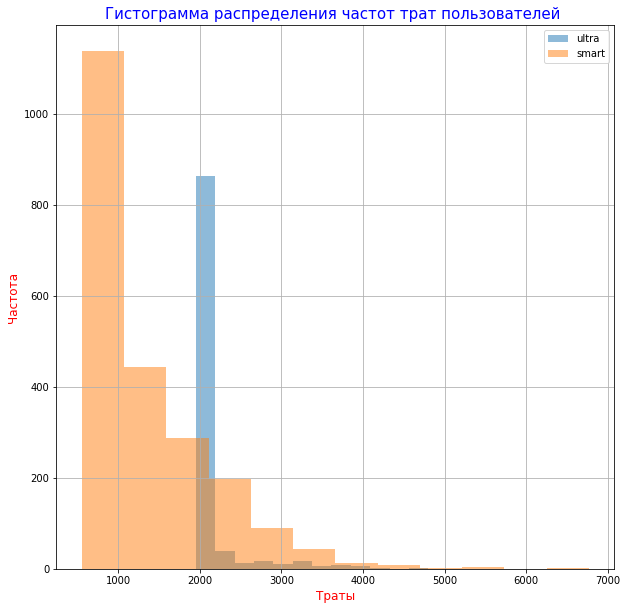

In [51]:
total_ultra['revenue_total'].hist(bins=12, alpha =0.5, figsize=(10,10))
total_smart['revenue_total'].hist(bins=12, alpha =0.5, figsize=(10,10))
plt.xlabel('Траты', fontsize = 12, color = 'red')
plt.ylabel('Частота', fontsize = 12, color = 'red')
plt.title('Гистограмма распределения частот трат пользователей ', fontsize = 15, color = 'blue')
plt.legend(['ultra','smart'])


variance_ultra = np.var(total_ultra['revenue_total'])
print(f' Дисперсия для расходов на тарифе ultra : {variance_ultra}')

standard_deviation_ultra = np.sqrt(variance_ultra)
print(f' Стандартное отклонение для расходов на тарифе ultra : {standard_deviation_ultra}')

mean_ultra = total_ultra['revenue_total'].mean()
median_ultra = total_ultra['revenue_total'].median()
print(f' Среднее значение расходов на тарифе ultra : {mean_ultra}')
print(f' Медианное значение расходов на тарифе ultra : {median_ultra}')

print()

variance_smart = np.var(total_smart['revenue_total'])
print(f' Дисперсия для расходов на тарифе smart : {variance_smart}')

standard_deviation_smart = np.sqrt(variance_smart)
print(f' Стандартное отклонение для расходов на тарифе smart : {standard_deviation_smart}')

mean_smart = total_smart['revenue_total'].mean()
median_smart = total_smart['revenue_total'].median()
print(f' Среднее значение расходов на тарифе smart : {mean_smart}')
print(f' Медианное значение расходов на тарифе smart : {median_smart}')

Видны следующие особенности тарифов:
1) Пользователи тарифа ultra в подавляющем большинстве случаев укладываются в абонентскую плату, дополнительные платы случаются, но редко. Встречающийся максимум около 4000;

2) В тарифе smart в абонетскую подавляющее большинство не укладывается порядка 2х раз, однако при условии что медианная трата 1027 руб получается дешевле чем ultra. Зафиксированный максимум порядка 7000.

Проверим средниее траты клиентов по каждому из тарифов:

In [52]:
sum_smart = total_smart['revenue_total'].sum()
count_smart = total_smart['revenue_total'].count()

sum_ultra = total_ultra['revenue_total'].sum()
count_ultra = total_ultra['revenue_total'].count()
print(f' Траты клиентов на тарифе smart : {sum_smart}')
print(f' Количество клиентов на тарифе smart (в выборке): {count_smart}')

print(f' Траты клиентов на тарифе ultra : {sum_ultra}')
print(f' Количество клиентов на тарифе ultra (в выборке): {count_ultra}')

 Траты клиентов на тарифе smart : 2875351.0
 Количество клиентов на тарифе smart (в выборке): 2229
 Траты клиентов на тарифе ultra : 2039100.0
 Количество клиентов на тарифе ultra (в выборке): 985


**Вывод :** Количество клиентов на тарифе smart больше в 2,3 раза. Ожидаемо, так как тариф получается выгоднее. Совокупные траты в 1,42 раза больше, что тоже приличный показатель

### Длительность разговоров

Построим гистограммы распределения для времени разговоров и основные статистические характеристики (дисперсия,  среднее, медиана, стандартное отклонение)

 Дисперсия для продолжительности звонков на тарифе ultra : 100771.2236172022
 Стандартное отклонение для продолжительности звонков на тарифе ultra : 317.44483554974113
 Средняя продолжительность звонков на тарифе ultra : 526.6233502538071
 Медианная продолжительность звонков на тарифе ultra : 518.0

 Дисперсия для продолжительности звонков на тарифе smart : 36203.06665209469
 Стандартное отклонение для продолжительности звонков на тарифе smart : 190.27103471651876
 Средняя продолжительность звонков на тарифе smart : 417.9349484073576
 Медианная продолжительность звонков на тарифе smart : 422.0


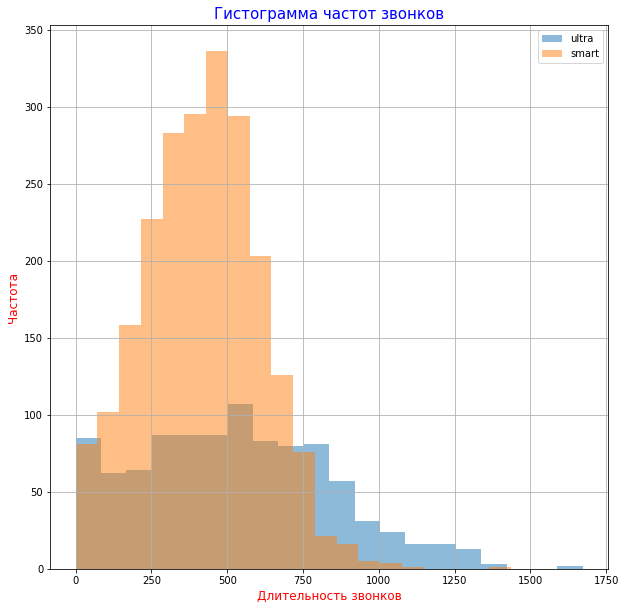

In [53]:
total_ultra['duration_calls'].hist(bins=20, alpha =0.5, figsize=(10,10))
total_smart['duration_calls'].hist(bins=20, alpha =0.5)
plt.legend(['ultra', 'smart'])
plt.xlabel('Длительность звонков', fontsize = 12, color = 'red')
plt.ylabel('Частота', fontsize = 12, color = 'red')
plt.title('Гистограмма частот звонков', fontsize = 15, color = 'blue')


variance_ultra = np.var(total_ultra['duration_calls'])
print(f' Дисперсия для продолжительности звонков на тарифе ultra : {variance_ultra}')

standard_deviation_ultra = np.sqrt(variance_ultra)
print(f' Стандартное отклонение для продолжительности звонков на тарифе ultra : {standard_deviation_ultra}')

mean_ultra = total_ultra['duration_calls'].mean()
median_ultra = total_ultra['duration_calls'].median()
print(f' Средняя продолжительность звонков на тарифе ultra : {mean_ultra}')
print(f' Медианная продолжительность звонков на тарифе ultra : {median_ultra}')

print()

variance_smart = np.var(total_smart['duration_calls'])
print(f' Дисперсия для продолжительности звонков на тарифе smart : {variance_smart}')

standard_deviation_smart = np.sqrt(variance_smart)
print(f' Стандартное отклонение для продолжительности звонков на тарифе smart : {standard_deviation_smart}')

mean_smart = total_smart['duration_calls'].mean()
median_smart = total_smart['duration_calls'].median()
print(f' Средняя продолжительность звонков на тарифе smart : {mean_smart}')
print(f' Медианная продолжительность звонков на тарифе smart : {median_smart}')

Отметим следующие особенности гистограмм для длительности звонков:

1) У тарифа smart распределение близко к нормальному. Можно сказать что половине клиентов хватает тарифных 500 минут, а другой нет;

2) у тарифа ultra для каждой из корзин до 1000 минут частота практически одинаковая. В 3000 минут укладываются все. Есть некоторое количество клиентов с длительностью звонков 750-1250 минут которых больше чем в smart. Однако существенной разницы между тарифами нет.

**Вывод:** клиенты тарифа ultra используют только половину своих тарифных минут, возможно для **этого тарифа можно было бы уменьшить абонетскую плату за счет снижения количества предоставляемых минут в 2 раза**. Для подавляющего большинтсва этого вполне достаточно.

### Количество звонков

Построим гистограммы распределения для количества звонков и основные статистические характеристики (дисперсия, среднее, медиана, стандартное отклонение)

 Дисперсия для количества звонков на тарифе ultra : 1926.7319291916822
 Стандартное отклонение для количества звонков на тарифе ultra : 43.89455466446473
 Среднее количество звонков на тарифе ultra : 73.39289340101523
 Медианное количество звонков на тарифе ultra : 74.0

 Дисперсия для количества звонков на тарифе smart : 672.5743697067148
 Стандартное отклонение для количества звонков на тарифе smart : 25.934038823652493
 Среднее количество звонков на тарифе smart : 58.46343651861822
 Медианное количество звонков на тарифе smart : 60.0


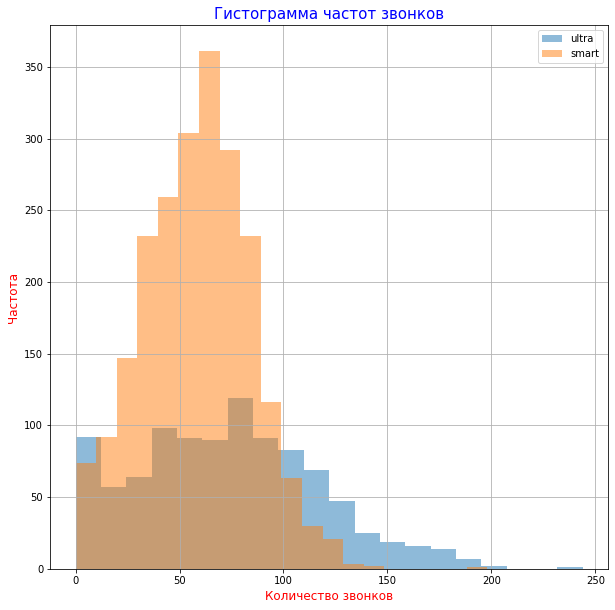

In [54]:
total_ultra['calls_count'].hist(bins=20, alpha =0.5, figsize=(10,10))
total_smart['calls_count'].hist(bins=20, alpha =0.5)
plt.legend(['ultra', 'smart'])
plt.xlabel('Количество звонков', fontsize = 12, color = 'red')
plt.ylabel('Частота', fontsize = 12, color = 'red')
plt.title('Гистограмма частот звонков', fontsize = 15, color = 'blue')


variance_ultra = np.var(total_ultra['calls_count'])
print(f' Дисперсия для количества звонков на тарифе ultra : {variance_ultra}')

standard_deviation_ultra = np.sqrt(variance_ultra)
print(f' Стандартное отклонение для количества звонков на тарифе ultra : {standard_deviation_ultra}')

mean_ultra = total_ultra['calls_count'].mean()
median_ultra = total_ultra['calls_count'].median()
print(f' Среднее количество звонков на тарифе ultra : {mean_ultra}')
print(f' Медианное количество звонков на тарифе ultra : {median_ultra}')

print()

variance_smart = np.var(total_smart['calls_count'])
print(f' Дисперсия для количества звонков на тарифе smart : {variance_smart}')

standard_deviation_smart = np.sqrt(variance_smart)
print(f' Стандартное отклонение для количества звонков на тарифе smart : {standard_deviation_smart}')

mean_smart = total_smart['calls_count'].mean()
median_smart = total_smart['calls_count'].median()
print(f' Среднее количество звонков на тарифе smart : {mean_smart}')
print(f' Медианное количество звонков на тарифе smart : {median_smart}')

**Вывод:** гистограммы абсолютно коррелируют с длительностью разговоров. Вероятно это связано с тем что большинство звонков уложолись в одну минуту

### Количество смс

 Дисперсия для смс на тарифе ultra : 2282.9460753948824
 Стандартное отклонение для смс на тарифе ultra : 47.78018496610161
 Среднее количество смс на тарифе ultra : 49
 Медианное количество смс на тарифе ultra : 38.0

 Дисперсия для смс на тарифе smart : 796.455482917076
 Стандартное отклонение для смс на тарифе smart : 28.221542886898938
 Среднее количество смс на тарифе smart : 33
 Медианное количество смс на тарифе smart : 28.0


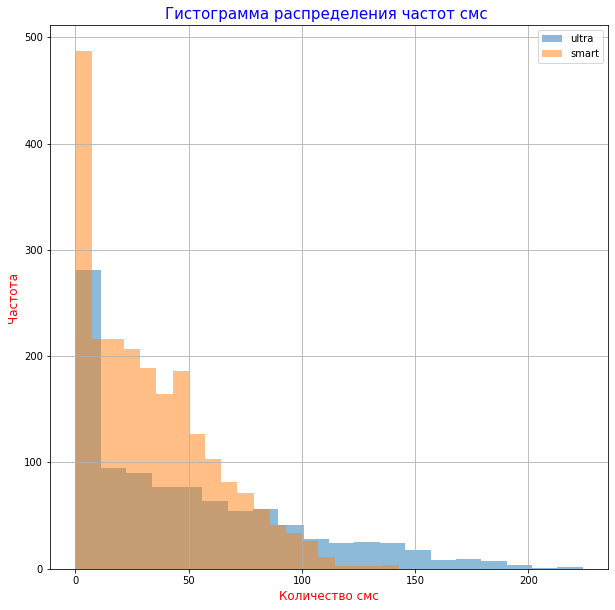

In [55]:
total_ultra['sms_count'].hist(bins=20, alpha =0.5, figsize=(10,10))
total_smart['sms_count'].hist(bins=20, alpha =0.5)
plt.legend(['ultra', 'smart'])
plt.xlabel('Количество смс', fontsize = 12, color = 'red')
plt.ylabel('Частота', fontsize = 12, color = 'red')
plt.title('Гистограмма распределения частот смс ', fontsize = 15, color = 'blue')




variance_ultra = np.var(total_ultra['sms_count'])
print(f' Дисперсия для смс на тарифе ultra : {variance_ultra}')

standard_deviation_ultra = np.sqrt(variance_ultra)
print(f' Стандартное отклонение для смс на тарифе ultra : {standard_deviation_ultra}')

mean_ultra = round(total_ultra['sms_count'].mean())
median_ultra = total_ultra['sms_count'].median()
print(f' Среднее количество смс на тарифе ultra : {mean_ultra}')
print(f' Медианное количество смс на тарифе ultra : {median_ultra}')
print()

variance_smart = np.var(total_smart['sms_count'])
print(f' Дисперсия для смс на тарифе smart : {variance_smart}')

standard_deviation_smart = np.sqrt(variance_smart)
print(f' Стандартное отклонение для смс на тарифе smart : {standard_deviation_smart}')

mean_smart = round(total_smart['sms_count'].mean())
median_smart = total_smart['sms_count'].median()
print(f' Среднее количество смс на тарифе smart : {mean_smart}')
print(f' Медианное количество смс на тарифе smart : {median_smart}')

1) На тарифе smart значительной части пользователей хватает 50 сообщений месяц. Аналогичная ситуация, как и со звонками. Все заканчивается на 100 смс в месяц;

2) На тарифе ultra все уложились в 1000 сообщений ( по факту максимум около 200 ). Значительный перебор

Стоит заметить, что 0 смс имеет самую высокую частоту в обеих выборках.

**Вывод:** **смс не пользуются особой популярностью** большей половине пользователей вполне достаточно установленных лимитов. В тарифе  smart при превышении лимита прибыль компании несущественная (максимум 50 рублей) . Вероятно можно **пересмотреть стоимость смс**, вероятно на этом можно дополнительно немного заработать.

### Интернет траффик

 Дисперсия для интернет траффика на тарифе ultra : 96.99311602978689
 Стандартное отклонение для интернет траффика на тарифе ultra : 9.848508314957494
 Среднее количество интернет траффика на тарифе ultra : 19
 Медианное количество интернет траффика на тарифе ultra : 19.0

 Дисперсия для интернет траффика на тарифе smart : 33.013887454837445
 Стандартное отклонение для интернет траффика на тарифе smart : 5.745771267187499
 Среднее количество интернет траффика на тарифе smart : 16
 Медианное количество интернет траффика на тарифе smart : 17.0


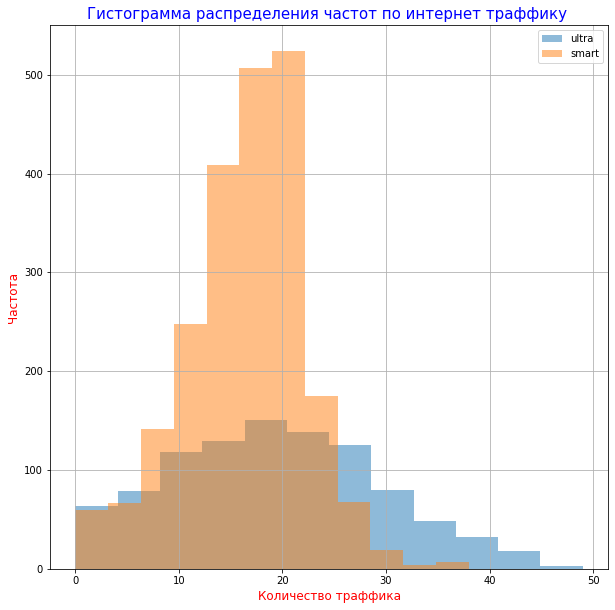

In [56]:
total_ultra['gb_used'].hist(bins=12, alpha =0.5, figsize=(10,10))
total_smart['gb_used'].hist(bins=12, alpha =0.5)
plt.legend(['ultra', 'smart'])
plt.xlabel('Количество траффика', fontsize = 12, color = 'red')
plt.ylabel('Частота', fontsize = 12, color = 'red')
plt.title('Гистограмма распределения частот по интернет траффику ', fontsize = 15, color = 'blue')




variance_ultra = np.var(total_ultra['gb_used'])
print(f' Дисперсия для интернет траффика на тарифе ultra : {variance_ultra}')

standard_deviation_ultra = np.sqrt(variance_ultra)
print(f' Стандартное отклонение для интернет траффика на тарифе ultra : {standard_deviation_ultra}')

median_ultra = total_ultra['gb_used'].median()
mean_ultra = round(total_ultra['gb_used'].mean())
print(f' Среднее количество интернет траффика на тарифе ultra : {mean_ultra}')
print(f' Медианное количество интернет траффика на тарифе ultra : {median_ultra}')
print()

variance_smart = np.var(total_smart['gb_used'])
print(f' Дисперсия для интернет траффика на тарифе smart : {variance_smart}')

standard_deviation_smart = np.sqrt(variance_smart)
print(f' Стандартное отклонение для интернет траффика на тарифе smart : {standard_deviation_smart}')

median_smart = total_smart['gb_used'].median()
mean_smart = round(total_smart['gb_used'].mean())
print(f' Среднее количество интернет траффика на тарифе smart : {mean_smart}')
print(f' Медианное количество интернет траффика на тарифе smart : {median_smart}')

1) на тарифе ultra недобор интернет траффика у большой части пользователи недобор в 10 gb. Распределение нормальное со смещение влево. Однако пользователей с трафиком более 30 тоже вполне прилично, чего нет у тарифа smart;

2) у тарифа smart пик частот около 17 gb. Однако исходя из гистограммы большинству хватает 15 гб. Стоит заметить что есть группа людей около 25 gb Траффика. При условии что 1 гб стоит 200 руб по итогу получается около 2000 - превосходит стоимость тариф ultra.

**Вывод:** на тарифе ultra люди часто переплачивают за интернет, а на smart приличной части клиентов немного не хватает траффика. 

**Вывод по разделу:** Стоит отметить:
1) тариф smart пользуется большей популярностью, однако людям немного не хватает выставленных лимитов на звонки и нтернет;

2) тариф ultra люди не используют тариф на все его возможности.

Стоит провести оптимизацию на предмет смс - понизить количество предоставляемых смс в тарифах ( возможно создать промежуточный тарифф) ими все равно пользуются мало. 

За превышение лимитов поднять цену до 2 руб. 

Для звонков на тарифе ultra снизить порог длительности звонков до 2000 минут

На тарифе  smart поднять лимит траффика до 20 gb с поднятием абонентской платы в рамках 1000 руб. На тариффе ультра опустить до 25.

Можно рассмотреть возможность создать и третий тарифф с некими средними параметрами услуг связи, согласно выводов. Однако есть риск потери клиентов из тариффа ультра. Поэтому оптимальнее будет оптимизировать текущие, особенно ultra. Думаю стоит поставить лимиты немного пониже, соответсвенно и абонентскую плату - это позволит перетянуть некотрых клиентов с тариффа smart в более дорогой тарифф, соответсвенно таким образом поднять прибыль с одного. 


<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера v_1
Отлично
    
Шаг выполнен отлично, если есть желание и время, можешь попробовать сделать данный пункт еще элегантнее и лаконичнее. Для этого выведи три гистограммы рядом друг с другом. 
    
Чтобы вывести графики рядом друг с другом используются сабплоты. 
    
Рекомендую ознакомиться со статьей, там отлично написано как ведет себя matplotlib
    
https://pyprog.pro/mpl/mpl_main_components.html
</div>

## Проверка гипотез

В данном разделе будем проверять гипотезы, их две:

 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Выборки между собой являются независимымы, поэтому для проверки гипотиз будет использоваться t-критерий Стьюдента. 

Нулевая (H0) гипотеза формируется по правилу: "первая выборка **равна** второй" 

Альтернативная (H1) по правилу - отрицаем нулевую: "первая выборка **не равна** второй"

Альфа примем 0.05 ( установившееся норма):

In [58]:
alpha = 0.05

### гипотеза "средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"

Гипотеза о равенстве средних двух генеральных совокупностей №1

Сформулируем гипотезы:

H0: выручка пользователей тарифов «Ультра» и «Смарт» не различается


H1: выручка пользователей тарифов «Ультра» и «Смарт» различается

Пременим функцию к двум df, а потом на их основе создадим два series для проверки по критерию Стьюдента

In [59]:
ultra = total_ultra['revenue_total']
smart = total_smart['revenue_total']

In [60]:
results = st.ttest_ind(ultra, smart)

Сравним alpha и значение p

In [61]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


**Вывод:** Есть основание полагать, что выручка пользователей тарифа smart и ultra различается. Это так же было замечано в пункте 3.1 на конкретных цифрах  1290 и 2070 для каждого из тарифов. Проверка гипотезы этому не противоречит.

### Гипотеза "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов."

Сформируем гипотезы:


H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Все дальнейшие действия аналогичны:

In [62]:
moscow_test = moscow['revenue_total']

In [63]:
other_test = other['revenue_total']

In [64]:
results = st.ttest_ind(other_test, moscow_test)

In [65]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


Посмотрим на реальных цифрах:

In [66]:
moscow['revenue_total'].median()

1750.0

In [67]:
other['revenue_total'].median()

1583.0

В реальных цифрах разница получилась равной 167 рублям. Разница не существенная, поэтому гипотеза: "средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов " (H0) является верной. На что указывает и стат. тест - есть основание полагать, что гипотеза H0 верная.

**Вывод:** "средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов " (H0)

## Вывод

1) тариф smart приносит (для всех клиентов. Из-за большего количества пользователей) больше прибыли, чем ultra;

2) в тарифе ultra есть явный избыток предоставляемых услуг. Стоит поработать с условиями, либо создать третий тариф с некими "средними" условиями;

3) Гипотеза "средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются" подтвердилась;

4) Гипотеза "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов." не подтвердилась.